In [1]:
import os
import sys

sys.path.append('/home/robinm/phd/problog/')



In [2]:
from problog.program import PrologString
from problog.prolog_engine.translate import TranslatedProgram, translate_clasusedb
from problog.engine import DefaultEngine
from problog.logic import Term, Var
from problog.formula import LogicFormula
from graphviz import Source
from problog.sdd_formula import SDD

In [3]:
file = '''
a(Y) :-\+b(X), c(Y).
0.5::b(0).
c(X) :- d(X).
d(0).
'''
program = PrologString(file)
engine = DefaultEngine()
db = engine.prepare(program)

# ProbLog

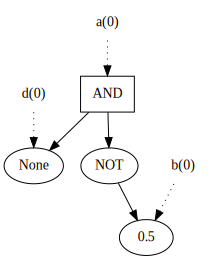

In [4]:
formula = LogicFormula(keep_all=True)
ground = engine.ground_all(db, target=formula, queries=[Term('a',Var('Y'))])

Source(ground.to_dot())

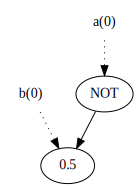

In [5]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [6]:
ac.evaluate()

{a(0): 0.5}

# New engine

In [7]:
translated = translate_clasusedb(db)
print(translated)

ad([p(1.0,a(A1))],[neg(b(A2)),c(A1)]).
ad([p(0.5,b(0))],[]).
ad([p(1.0,c(A1))],[d(A1)]).
ad([p(1.0,d(0))],[]).


In [8]:
proofs = translated.get_proofs('a(X)')
print(proofs)

[[(0.5, b(0), True), (1.0, d(0), False)]]


In [9]:
formula2 = translated.to_logic_formula('a(X)', LogicFormula(keep_all=True))

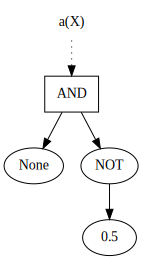

In [10]:

Source(formula2.to_dot())

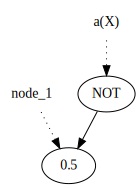

In [11]:
ac2 = SDD.create_from(formula2)
Source(ac2.to_dot())

In [12]:
ac2.evaluate()


{a(X): 0.5}